# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

import os

In [2]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

In [3]:
Datatypes = pd.read_csv('datatypes.csv')
Nodes = pd.read_csv('nodes.csv')
Sensors = pd.read_csv('sensors.csv')
Volcanos = pd.read_csv('volcanos.csv')
datapoints=  pd.read_csv('datapoints.csv')

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [4]:
Datatypes.head()

id                            type  \
0  35dcb3c0-8679-11e6-bda3-ef77801087ee                     temperature   
1  35dcb3c1-8679-11e6-bda3-ef77801087ee                        pressure   
2  35dcb3c2-8679-11e6-bda3-ef77801087ee                        humidity   
3  35dcdad0-8679-11e6-bda3-ef77801087ee    carbon dioxide concentration   
4  35dcdad1-8679-11e6-bda3-ef77801087ee  hydrogen sulfide concentration   

             si_unit type_id  
0            celcius     TCA  
1             pascal      PA  
2  relative humidity    HUMA  
3                ppm  GP_CO2  
4                ppm  GP_H2S

In [5]:
Nodes.head()

id name description location   status  \
0  c5e39fa0-867a-11e6-a353-2f6c041e2491   N1          \N       \N  OFFLINE   
1  c147ece0-8679-11e6-a353-2f6c041e2491   N9          \N       \N  OFFLINE   
2  76309900-8679-11e6-a353-2f6c041e2491   N8          \N       \N  OFFLINE   
3  762b8ff0-8679-11e6-a353-2f6c041e2491  N10          \N       \N  OFFLINE   
4  c14ccee0-8679-11e6-a353-2f6c041e2491   N2          \N       \N  OFFLINE   

               created_at                  updated_at  \
0  2016-08-17 01:06:49+00  2016-09-29 19:28:05.932+00   
1  2016-08-07 00:51:40+00  2016-09-29 19:41:07.065+00   
2  2016-08-03 22:09:40+00  2016-09-29 19:20:17.417+00   
3  2016-08-03 04:39:25+00  2016-09-29 19:20:17.431+00   
4  2016-08-10 04:20:22+00  2016-09-29 19:20:17.523+00   

                             volcano_id  
0  35dc3e90-8679-11e6-bda3-ef77801087ee  
1  35dc3e90-8679-11e6-bda3-ef77801087ee  
2  35dc3e90-8679-11e6-bda3-ef77801087ee  
3  35dc3e90-8679-11e6-bda3-ef77801087ee  
4  35dc3e90-8679-11e6-bda3-ef77801087ee

In [6]:
Nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
id             11 non-null object
name           11 non-null object
description    11 non-null object
location       11 non-null object
status         11 non-null object
created_at     11 non-null object
updated_at     11 non-null object
volcano_id     11 non-null object
dtypes: object(8)
memory usage: 832.0+ bytes


In [7]:
#converting created_at and updated_at column to datetime
Nodes['created_at']= Nodes['created_at'].apply(pd.to_datetime, errors='coerce')
Nodes['updated_at']= Nodes['updated_at'].apply(pd.to_datetime, errors='coerce')
Nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
id             11 non-null object
name           11 non-null object
description    11 non-null object
location       11 non-null object
status         11 non-null object
created_at     11 non-null datetime64[ns, UTC]
updated_at     11 non-null datetime64[ns, UTC]
volcano_id     11 non-null object
dtypes: datetime64[ns, UTC](2), object(6)
memory usage: 832.0+ bytes


In [8]:
Sensors.head()

id description  data_frequency   status  \
0  c15a6370-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1  7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2  763b9580-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3  763ca6f0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4  763d9150-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   

               created_at                  updated_at  \
0  2016-08-07 00:51:40+00  2016-09-29 19:41:07.066+00   
1  2016-08-03 04:39:25+00  2016-09-29 20:13:52.793+00   
2  2016-08-03 04:39:25+00  2016-09-29 20:13:52.797+00   
3  2016-08-03 04:39:25+00  2016-09-29 20:13:52.803+00   
4  2016-08-03 04:39:25+00  2016-09-29 20:13:52.811+00   

                           data_type_id                               node_id  
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491  
1  35dcdad2-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
2  35dcdad1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
3  35dcb3c0-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
4  35dcb3c1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491

In [9]:
Sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
id                61 non-null object
description       61 non-null object
data_frequency    61 non-null int64
status            61 non-null object
created_at        61 non-null object
updated_at        61 non-null object
data_type_id      61 non-null object
node_id           61 non-null object
dtypes: int64(1), object(7)
memory usage: 3.9+ KB


In [10]:
#converting created_at and updated_at column to datetime
Sensors['created_at']= Sensors['created_at'].apply(pd.to_datetime, errors='coerce')
Sensors['updated_at']=Sensors['updated_at'].apply(pd.to_datetime, errors='coerce')
Sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
id                61 non-null object
description       61 non-null object
data_frequency    61 non-null int64
status            61 non-null object
created_at        61 non-null datetime64[ns, UTC]
updated_at        61 non-null datetime64[ns, UTC]
data_type_id      61 non-null object
node_id           61 non-null object
dtypes: datetime64[ns, UTC](2), int64(1), object(5)
memory usage: 3.9+ KB


In [11]:
Volcanos.head()

id    name  \
0  35dc3e90-8679-11e6-bda3-ef77801087ee  Masaya   

                                         description  \
0  This is the world's biggest, baddest, most evi...   

                                   location   status  \
0  {11.985318299999999,-86.178342900000004}  OFFLINE   

                   created_at                  updated_at  
0  2016-09-29 19:16:23.419+00  2016-10-07 07:43:05.015+00

In [12]:
Volcanos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
id             1 non-null object
name           1 non-null object
description    1 non-null object
location       1 non-null object
status         1 non-null object
created_at     1 non-null object
updated_at     1 non-null object
dtypes: object(7)
memory usage: 184.0+ bytes


In [13]:
#converting created_at and updated_at column to datetime
Volcanos['created_at']= Volcanos['created_at'].apply(pd.to_datetime, errors='coerce')
Volcanos['updated_at']=Volcanos['updated_at'].apply(pd.to_datetime, errors='coerce')
Volcanos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
id             1 non-null object
name           1 non-null object
description    1 non-null object
location       1 non-null object
status         1 non-null object
created_at     1 non-null datetime64[ns, UTC]
updated_at     1 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(5)
memory usage: 184.0+ bytes


In [14]:
datapoints.head()

id      value               timestamp  \
0  764c5e60-8679-11e6-a353-2f6c041e2491     98.000  2016-08-03 04:39:25+00   
1  764c5e61-8679-11e6-a353-2f6c041e2491     33.198  2016-08-03 04:39:25+00   
2  764dbdf0-8679-11e6-a353-2f6c041e2491     29.300  2016-08-03 04:39:25+00   
3  764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110  2016-08-03 04:39:25+00   
4  764dbdf2-8679-11e6-a353-2f6c041e2491    459.736  2016-08-03 04:39:25+00   

                              sensor_id  
0  7635c920-8679-11e6-a353-2f6c041e2491  
1  763b9580-8679-11e6-a353-2f6c041e2491  
2  763ca6f0-8679-11e6-a353-2f6c041e2491  
3  763d9150-8679-11e6-a353-2f6c041e2491  
4  763701a1-8679-11e6-a353-2f6c041e2491

In [15]:
datapoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176534 entries, 0 to 176533
Data columns (total 4 columns):
id           176534 non-null object
value        63456 non-null float64
timestamp    176534 non-null object
sensor_id    176534 non-null object
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


In [16]:
#converting timestamp column to datetime
datapoints['timestamp']= datapoints['timestamp'].apply(pd.to_datetime, errors='coerce')
datapoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176534 entries, 0 to 176533
Data columns (total 4 columns):
id           176534 non-null object
value        63456 non-null float64
timestamp    176534 non-null datetime64[ns, UTC]
sensor_id    176534 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 5.4+ MB


### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Show each one in a separate subplot.

**What (if anything) can we tell about the various sensors from the plots?**


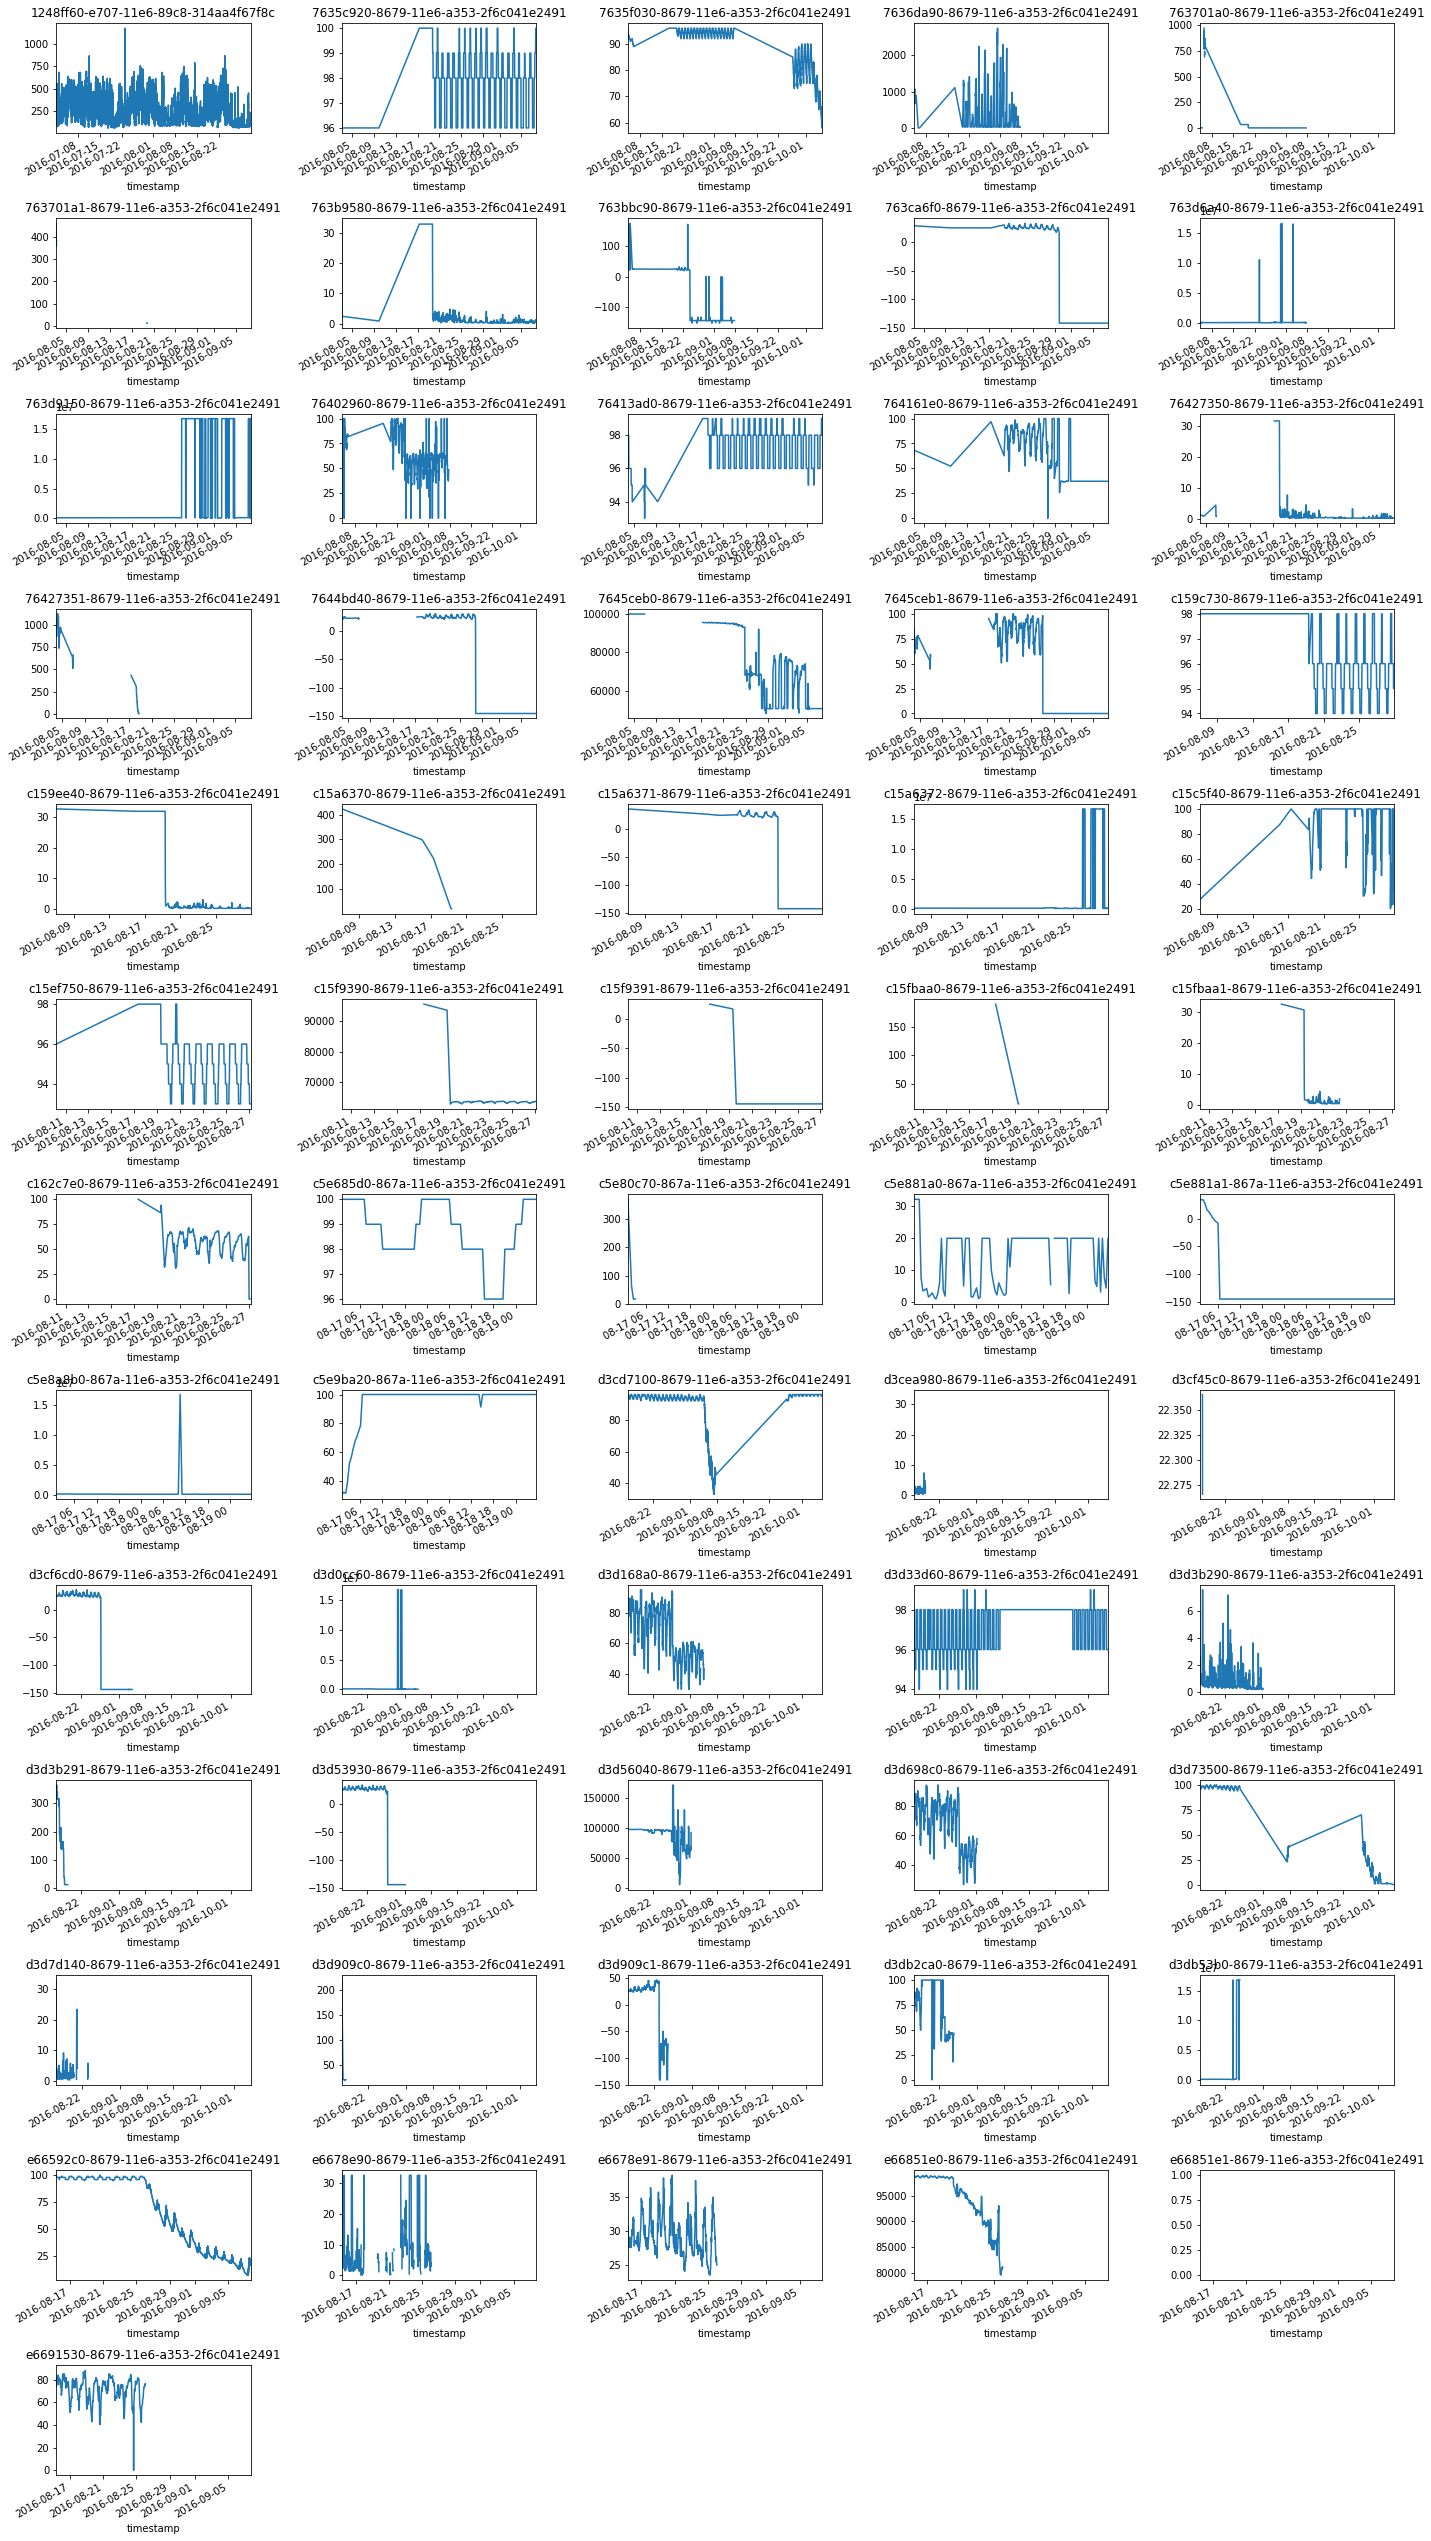

In [17]:
plt.figure(figsize=(20,40), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1
for sensortype, selection in datapoints.groupby("sensor_id"):
    # Inside of an image that's a 15x13 grid
    ax = plt.subplot(15, 5, plot_number)
    selection.plot(x='timestamp', y='value', ax=ax, label=sensortype, legend=False)
    ax.set_title(sensortype)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
        
plt.tight_layout()

plt.savefig('plot.png', dpi=300, bbox_inches='tight')

### 3.0 Descriptive Analysis One data frame at a time



You have two data frames: `sensors` and `types` Merge each sensor_id with its type. (Hint: Use `pd.merge()`)



In [18]:
full = pd.merge(Sensors, Datatypes, left_on='data_type_id' ,right_on='id') 
full.head(2)

id_x description  data_frequency   status  \
0  c15a6370-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1  7636da90-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   

                 created_at                       updated_at  \
0 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1 2016-08-03 21:50:32+00:00 2016-09-30 18:12:04.577000+00:00   

                           data_type_id                               node_id  \
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   
1  35dcdad0-8679-11e6-bda3-ef77801087ee  762c5340-8679-11e6-a353-2f6c041e2491   

                                   id_y                          type si_unit  \
0  35dcdad0-8679-11e6-bda3-ef77801087ee  carbon dioxide concentration     ppm   
1  35dcdad0-8679-11e6-bda3-ef77801087ee  carbon dioxide concentration     ppm   

  type_id  
0  GP_CO2  
1  GP_CO2

3.1 Question: What does this achieve? Why should we do this?

To collerate the type of sensor with its datatype, that is if the sensor measures carbon dioxide concentration or humidity etc

3.2: How many sensors of each type are there?

In [19]:
len(datapoints.groupby("sensor_id"))

61

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

Take the raw `datapoints` data frame and merge it with all the `sensors` and their types.

In [20]:
#merge the remaining datarames:

merge = pd.merge(full,Nodes, left_on='node_id' ,right_on='id') 
merge.head(2)

id_x description_x  data_frequency  \
0  c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
1  c159c730-8679-11e6-a353-2f6c041e2491            \N         1800000   

  status_x              created_at_x                     updated_at_x  \
0  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 20:13:52.831000+00:00   

                           data_type_id                               node_id  \
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   
1  35dcdad2-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   

                                   id_y                          type  \
0  35dcdad0-8679-11e6-bda3-ef77801087ee  carbon dioxide concentration   
1  35dcdad2-8679-11e6-bda3-ef77801087ee                       battery   

      si_unit type_id                                    id name  \
0         ppm  GP_CO2  c147ece0-8679-11e6-a353-2f6c041e2491   N9   
1  percentage     BAT  c147ece0-8679-11e6-a353-2f6c041e2491   N9   

  description_y location status_y              created_at_y  \
0            \N       \N  OFFLINE 2016-08-07 00:51:40+00:00   
1            \N       \N  OFFLINE 2016-08-07 00:51:40+00:00   

                      updated_at_y                            volcano_id  
0 2016-09-29 19:41:07.065000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
1 2016-09-29 19:41:07.065000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee

In [21]:
merge2=merge.drop(['id', 'id_y'], axis=1)
merge2.head(2)

id_x description_x  data_frequency  \
0  c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
1  c159c730-8679-11e6-a353-2f6c041e2491            \N         1800000   

  status_x              created_at_x                     updated_at_x  \
0  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 20:13:52.831000+00:00   

                           data_type_id                               node_id  \
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   
1  35dcdad2-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   

                           type     si_unit type_id name description_y  \
0  carbon dioxide concentration         ppm  GP_CO2   N9            \N   
1                       battery  percentage     BAT   N9            \N   

  location status_y              created_at_y  \
0       \N  OFFLINE 2016-08-07 00:51:40+00:00   
1       \N  OFFLINE 2016-08-07 00:51:40+00:00   

                      updated_at_y                            volcano_id  
0 2016-09-29 19:41:07.065000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
1 2016-09-29 19:41:07.065000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee

-----

In [22]:
merge3 = pd.merge(merge2, Volcanos, left_on='volcano_id' ,right_on='id') 
merge3.head(2)

id_x description_x  data_frequency  \
0  c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
1  c159c730-8679-11e6-a353-2f6c041e2491            \N         1800000   

  status_x              created_at_x                     updated_at_x  \
0  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 20:13:52.831000+00:00   

                           data_type_id                               node_id  \
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   
1  35dcdad2-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   

                           type     si_unit  ...              created_at_y  \
0  carbon dioxide concentration         ppm  ... 2016-08-07 00:51:40+00:00   
1                       battery  percentage  ... 2016-08-07 00:51:40+00:00   

                      updated_at_y                            volcano_id  \
0 2016-09-29 19:41:07.065000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee   
1 2016-09-29 19:41:07.065000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee   

                                     id  name_y  \
0  35dc3e90-8679-11e6-bda3-ef77801087ee  Masaya   
1  35dc3e90-8679-11e6-bda3-ef77801087ee  Masaya   

                                         description  \
0  This is the world's biggest, baddest, most evi...   
1  This is the world's biggest, baddest, most evi...   

                                 location_y   status  \
0  {11.985318299999999,-86.178342900000004}  OFFLINE   
1  {11.985318299999999,-86.178342900000004}  OFFLINE   

                        created_at                       updated_at  
0 2016-09-29 19:16:23.419000+00:00 2016-10-07 07:43:05.015000+00:00  
1 2016-09-29 19:16:23.419000+00:00 2016-10-07 07:43:05.015000+00:00  

[2 rows x 25 columns]

In [23]:
#delete id in column to avoid duplications:
merge4=merge3.drop(['id'], axis=1)

In [24]:
datapoints1=datapoints.rename(columns={'id':'data_points'})  #rename the 'id' column from the datapoints dataframe before merging with the overall dataframe
#Overall Dataframe
Data = pd.merge(merge2, datapoints1, left_on='id_x' ,right_on='sensor_id') 
Data.head(2)

id_x description_x  data_frequency  \
0  c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
1  c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   

  status_x              created_at_x                     updated_at_x  \
0  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   

                           data_type_id                               node_id  \
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   
1  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   

                           type si_unit  ... description_y location status_y  \
0  carbon dioxide concentration     ppm  ...            \N       \N  OFFLINE   
1  carbon dioxide concentration     ppm  ...            \N       \N  OFFLINE   

               created_at_y                     updated_at_y  \
0 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.065000+00:00   
1 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.065000+00:00   

                             volcano_id                           data_points  \
0  35dc3e90-8679-11e6-bda3-ef77801087ee  c17df100-8679-11e6-a353-2f6c041e2491   
1  35dc3e90-8679-11e6-bda3-ef77801087ee  43ccb4c0-867a-11e6-a353-2f6c041e2491   

     value                 timestamp                             sensor_id  
0  422.650 2016-08-07 00:51:40+00:00  c15a6370-8679-11e6-a353-2f6c041e2491  
1  298.581 2016-08-16 01:15:58+00:00  c15a6370-8679-11e6-a353-2f6c041e2491  

[2 rows x 22 columns]

### 5.0 Time Series based analysis

Now, we are going to take this stitched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

     Note: If by this point the time stamp is not in datetime format, make sure it is in datetime format.
    Step 1: Resample the dataset to the daily level. (One observation per date)
    Step 2: For the resampled data, calculate the daily mean, min and max values for each sensor id.

In [25]:
#convert to datetime:

Data['timestamp']=pd.to_datetime(Data['timestamp'])

Data.set_index('timestamp', inplace=True)  #set tmestamp as index

In [26]:
Data

id_x description_x  \
timestamp                                                                       
2016-08-07 00:51:40+00:00  c15a6370-8679-11e6-a353-2f6c041e2491            \N   
2016-08-16 01:15:58+00:00  c15a6370-8679-11e6-a353-2f6c041e2491            \N   
2016-08-17 08:12:12+00:00  c15a6370-8679-11e6-a353-2f6c041e2491            \N   
2016-08-19 15:41:08+00:00  c15a6370-8679-11e6-a353-2f6c041e2491            \N   
2016-08-19 08:38:31+00:00  c15a6370-8679-11e6-a353-2f6c041e2491            \N   
...                                                         ...           ...   
2016-08-31 19:00:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   
2016-08-31 19:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   
2016-08-31 21:00:02+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   
2016-08-31 21:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   
2016-08-31 23:00:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   

                           data_frequency status_x              created_at_x  \
timestamp                                                                      
2016-08-07 00:51:40+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
2016-08-16 01:15:58+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
2016-08-17 08:12:12+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
2016-08-19 15:41:08+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
2016-08-19 08:38:31+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
...                                   ...      ...                       ...   
2016-08-31 19:00:01+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
2016-08-31 19:50:00+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
2016-08-31 21:00:02+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
2016-08-31 21:50:00+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
2016-08-31 23:00:00+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   

                                              updated_at_x  \
timestamp                                                    
2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
2016-08-16 01:15:58+00:00 2016-09-29 19:41:07.066000+00:00   
2016-08-17 08:12:12+00:00 2016-09-29 19:41:07.066000+00:00   
2016-08-19 15:41:08+00:00 2016-09-29 19:41:07.066000+00:00   
2016-08-19 08:38:31+00:00 2016-09-29 19:41:07.066000+00:00   
...                                                    ...   
2016-08-31 19:00:01+00:00 2017-01-30 16:24:05.832000+00:00   
2016-08-31 19:50:00+00:00 2017-01-30 16:24:05.832000+00:00   
2016-08-31 21:00:02+00:00 2017-01-30 16:24:05.832000+00:00   
2016-08-31 21:50:00+00:00 2017-01-30 16:24:05.832000+00:00   
2016-08-31 23:00:00+00:00 2017-01-30 16:24:05.832000+00:00   

                                                   data_type_id  \
timestamp                                                         
2016-08-07 00:51:40+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
2016-08-16 01:15:58+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
2016-08-17 08:12:12+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
2016-08-19 15:41:08+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
2016-08-19 08:38:31+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
...                                                         ...   
2016-08-31 19:00:01+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 19:50:00+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 21:00:02+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 21:50:00+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 23:00:00+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                                        node_id  \
timestamp                                                         
2016-08-07 00:51:40+00:00  c147ece0-8679-11e6-a353-2f6c041e2491   
2016-08-16 01:15:58+00:00  c147ece0-8679-11e6-a353-2f6c041e2491   
2016-08-17 08:12:

In [27]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176534 entries, 2016-08-07 00:51:40+00:00 to 2016-08-31 23:00:00+00:00
Data columns (total 21 columns):
id_x              176534 non-null object
description_x     176534 non-null object
data_frequency    176534 non-null int64
status_x          176534 non-null object
created_at_x      176534 non-null datetime64[ns, UTC]
updated_at_x      176534 non-null datetime64[ns, UTC]
data_type_id      176534 non-null object
node_id           176534 non-null object
type              176534 non-null object
si_unit           176534 non-null object
type_id           176534 non-null object
name              176534 non-null object
description_y     176534 non-null object
location          176534 non-null object
status_y          176534 non-null object
created_at_y      176534 non-null datetime64[ns, UTC]
updated_at_y      176534 non-null datetime64[ns, UTC]
volcano_id        176534 non-null object
data_points       176534 non-null object
value        

Resample to get daily averages.
Then subset to select the columns you need.

Present the data in a summary similar to the example presented below:


![title](example-1.png)

In [28]:
Data.resample('1d').sum() #resample to daily level
Data.tail()

id_x description_x  \
timestamp                                                                       
2016-08-31 19:00:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   
2016-08-31 19:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   
2016-08-31 21:00:02+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   
2016-08-31 21:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   
2016-08-31 23:00:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   

                           data_frequency status_x              created_at_x  \
timestamp                                                                      
2016-08-31 19:00:01+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
2016-08-31 19:50:00+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
2016-08-31 21:00:02+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
2016-08-31 21:50:00+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
2016-08-31 23:00:00+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   

                                              updated_at_x  \
timestamp                                                    
2016-08-31 19:00:01+00:00 2017-01-30 16:24:05.832000+00:00   
2016-08-31 19:50:00+00:00 2017-01-30 16:24:05.832000+00:00   
2016-08-31 21:00:02+00:00 2017-01-30 16:24:05.832000+00:00   
2016-08-31 21:50:00+00:00 2017-01-30 16:24:05.832000+00:00   
2016-08-31 23:00:00+00:00 2017-01-30 16:24:05.832000+00:00   

                                                   data_type_id  \
timestamp                                                         
2016-08-31 19:00:01+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 19:50:00+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 21:00:02+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 21:50:00+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 23:00:00+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                                        node_id  type si_unit  \
timestamp                                                                       
2016-08-31 19:00:01+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-08-31 19:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-08-31 21:00:02+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-08-31 21:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-08-31 23:00:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   

                           ...  name description_y location status_y  \
timestamp                  ...                                         
2016-08-31 19:00:01+00:00  ...  RSAM            \N       \N  OFFLINE   
2016-08-31 19:50:00+00:00  ...  RSAM            \N       \N  OFFLINE   
2016-08-31 21:00:02+00:00  ...  RSAM            \N       \N  OFFLINE   
2016-08-31 21:50:00+00:00  ...  RSAM            \N       \N  OFFLINE   
2016-08-31 23:00:00+00:00  ...  RSAM            \N       \N  OFFLINE   

                                              created_at_y  \
timestamp                                                    
2016-08-31 19:00:01+00:00 1970-01-17 23:35:31.231000+00:00   
2016-08-31 19:50:00+00:00 1970-01-17 23:35:31.231000+00:00   
2016-08-31 21:00:02+00:00 1970-01-17 23:35:31.231000+00:00   
2016-08-31 21:50:00+00:00 1970-01-17 23:35:31.231000+00:00   
2016-08-31 23:00:00+00:00 1970-01-17 23:35:31.231000+00:00   

                                              updated_at_y  \
timestamp                                                    
2016-08-31 19:00:01+00:00 2017-01-30 16:24:05.867000+00:00   
2016-08-31 19:50:00+00:00 2017-01-30 16:24:05.867000+00:00   
2016-08-31 21:00:02+00:00 2017-01-30 16:24:05.867000+00:00   
2016-08-31 21:50:00+00:00 2017-01-30 16:24:05.867000+00:00   
2016-08-31 23:00:00+00:00 2017-01-30 16:24:05.867000+00:00   

                                                     volcano_id  \
timestamp      

In [29]:
daily = Data[Data.type_id=='HUMA']['value'].resample('D')

info= {'Daily Mean':daily.mean(), 'Daily Min Value':  daily.min(), 'Daily Max Values': daily.max() }

humidity_data=pd.DataFrame(info, columns=['Daily Mean', 'Daily Min Value', 'Daily Max Values'])
humidity_data.head(2)

Daily Mean  Daily Min Value  Daily Max Values
timestamp                                                               
2016-08-03 00:00:00+00:00   66.673333              0.0              97.2
2016-08-04 00:00:00+00:00   74.151389              0.0             100.0

In [30]:
daily2 = Data[Data.type_id=='TCA']['value'].resample('D')

info2= {'Daily Mean':daily2.mean(), 'Daily Min Value':  daily2.min(), 'Daily Max Values': daily2.max() }

temp_data=pd.DataFrame(info2, columns=['Daily Mean', 'Daily Min Value', 'Daily Max Values'])
temp_data.head(2)


Daily Mean  Daily Min Value  Daily Max Values
timestamp                                                               
2016-08-03 00:00:00+00:00   43.191333            20.34            164.60
2016-08-04 00:00:00+00:00   35.914583            20.02            175.93

In [31]:
daily3 = Data[Data.type_id=='PA']['value'].resample('D')

info3= {'Daily Mean':daily3.mean(), 'Daily Min Value':  daily3.min(), 'Daily Max Values': daily3.max() }

pressure_data=pd.DataFrame(info3, columns=['Daily Mean', 'Daily Min Value', 'Daily Max Values'])
pressure_data.head(2)

Daily Mean  Daily Min Value  Daily Max Values
timestamp                                                                  
2016-08-03 00:00:00+00:00   99195.565333         80085.06         124279.34
2016-08-04 00:00:00+00:00  100867.833611         79413.42         137211.20

In [32]:
daily4 = Data[Data.type_id=='GP_CO2']['value'].resample('D')

info4= {'Daily Mean':daily4.mean(), 'Daily Min Value':  daily4.min(), 'Daily Max Values': daily4.max() }

CO2_data=pd.DataFrame(info4, columns=['Daily Mean', 'Daily Min Value', 'Daily Max Values'])
CO2_data.head(2)


Daily Mean  Daily Min Value  Daily Max Values
timestamp                                                               
2016-08-03 00:00:00+00:00  682.157933          358.964           995.179
2016-08-04 00:00:00+00:00  935.874162          669.898          1121.223

In [33]:
daily5 = Data[Data.type_id=='GP_H2S']['value'].resample('D')
info5= {'Daily Mean':daily5.mean(), 'Daily Min Value':  daily5.min(), 'Daily Max Values': daily5.max() }

H2S_data=pd.DataFrame(info5, columns=['Daily Mean', 'Daily Min Value', 'Daily Max Values'])
H2S_data.head(2)


Daily Mean  Daily Min Value  Daily Max Values
timestamp                                                               
2016-08-03 00:00:00+00:00    8.493733            1.096            33.198
2016-08-04 00:00:00+00:00    0.989569            0.663             1.724

In [34]:
daily6 = Data[Data.type_id=='BAT']['value'].resample('D')

info6= {'Daily Mean':daily6.mean(), 'Daily Min Value':  daily6.min(), 'Daily Max Values': daily6.max() }

battery_data=pd.DataFrame(info6, columns=['Daily Mean', 'Daily Min Value', 'Daily Max Values'])
battery_data.head(2)

Daily Mean  Daily Min Value  Daily Max Values
timestamp                                                               
2016-08-03 00:00:00+00:00   96.666667             94.0              98.0
2016-08-04 00:00:00+00:00   94.194444             91.0              98.0

### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/example-2.png" width=450 height=200>

In [35]:
#create new dataframe with temp sensor data: 
 
sensor= Data[['type_id', 'value', 'sensor_id']].copy()
sensor.head()

type_id    value  \
timestamp                                    
2016-08-07 00:51:40+00:00  GP_CO2  422.650   
2016-08-16 01:15:58+00:00  GP_CO2  298.581   
2016-08-17 08:12:12+00:00  GP_CO2  222.549   
2016-08-19 15:41:08+00:00  GP_CO2      NaN   
2016-08-19 08:38:31+00:00  GP_CO2   21.196   

                                                      sensor_id  
timestamp                                                        
2016-08-07 00:51:40+00:00  c15a6370-8679-11e6-a353-2f6c041e2491  
2016-08-16 01:15:58+00:00  c15a6370-8679-11e6-a353-2f6c041e2491  
2016-08-17 08:12:12+00:00  c15a6370-8679-11e6-a353-2f6c041e2491  
2016-08-19 15:41:08+00:00  c15a6370-8679-11e6-a353-2f6c041e2491  
2016-08-19 08:38:31+00:00  c15a6370-8679-11e6-a353-2f6c041e2491

In [36]:
sensors=pd.pivot_table(data=sensor, index=['timestamp'], columns= ['sensor_id'], values=['value'], aggfunc='mean')
sensors.head()

value  \
sensor_id                 1248ff60-e707-11e6-89c8-314aa4f67f8c   
timestamp                                                        
2016-07-01 00:00:31+00:00                                455.0   
2016-07-01 00:10:02+00:00                                213.0   
2016-07-01 00:20:00+00:00                                225.0   
2016-07-01 00:30:01+00:00                                321.0   
2016-07-01 00:40:00+00:00                                429.0   

                                                                \
sensor_id                 7635c920-8679-11e6-a353-2f6c041e2491   
timestamp                                                        
2016-07-01 00:00:31+00:00                                  NaN   
2016-07-01 00:10:02+00:00                                  NaN   
2016-07-01 00:20:00+00:00                                  NaN   
2016-07-01 00:30:01+00:00                                  NaN   
2016-07-01 00:40:00+00:00                                  NaN   

                                                                \
sensor_id                 7635f030-8679-11e6-a353-2f6c041e2491   
timestamp                                                        
2016-07-01 00:00:31+00:00                                  NaN   
2016-07-01 00:10:02+00:00                                  NaN   
2016-07-01 00:20:00+00:00                                  NaN   
2016-07-01 00:30:01+00:00                                  NaN   
2016-07-01 00:40:00+00:00                                  NaN   

                                                                \
sensor_id                 7636da90-8679-11e6-a353-2f6c041e2491   
timestamp                                                        
2016-07-01 00:00:31+00:00                                  NaN   
2016-07-01 00:10:02+00:00                                  NaN   
2016-07-01 00:20:00+00:00                                  NaN   
2016-07-01 00:30:01+00:00                                  NaN   
2016-07-01 00:40:00+00:00                                  NaN   

                                                                \
sensor_id                 763701a0-8679-11e6-a353-2f6c041e2491   
timestamp                                                        
2016-07-01 00:00:31+00:00                                  NaN   
2016-07-01 00:10:02+00:00                                  NaN   
2016-07-01 00:20:00+00:00                                  NaN   
2016-07-01 00:30:01+00:00                                  NaN   
2016-07-01 00:40:00+00:00                                  NaN   

                                                                \
sensor_id                 763701a1-8679-11e6-a353-2f6c041e2491   
timestamp                                                        
2016-07-01 00:00:31+00:00                                  NaN   
2016-07-01 00:10:02+00:00                                  NaN   
2016-07-01 00:20:00+00:00                                  NaN   
2016-07-01 00:30:01+00:00                                  NaN   
2016-07-01 00:40:00+00:00                                  NaN   

                                                                \
sensor_id                 763b9580-8679-11e6-a353-2f6c041e2491   
timestamp                                                        
2016-07-01 00:00:31+00:00                                  NaN   
2016-07-01 00:10:02+00:00                                  NaN   
2016-07-01 00:20:00+00:00                                  NaN   
2016-07-01 00:30:01+00:00                                  NaN   
2016-07-01 00:40:00+00:00                                  NaN   

                                                                \
sensor_id                 763bbc90-8679-11e6-a353-2f6c041e2491   
timestamp                                                        
2016-07-01 00:00:31+00:00                                  NaN   
2016-07-01 00:10:02+00:00                                  NaN   
2016-07-01 00:20:00+00:0

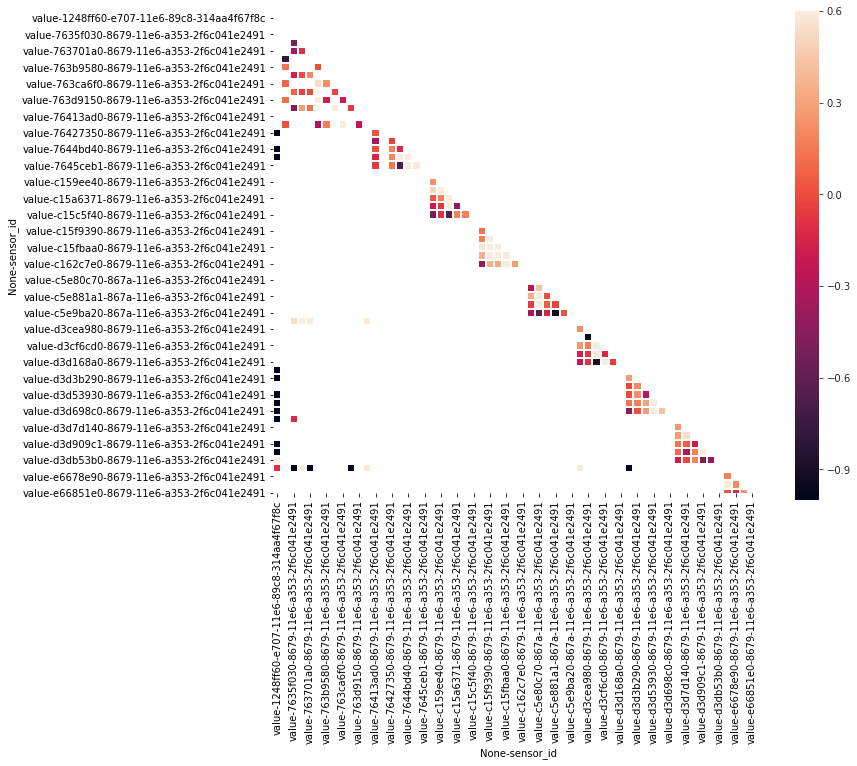

In [37]:
corr = sensors.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.6, square=True, linewidths=1)

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their type id's

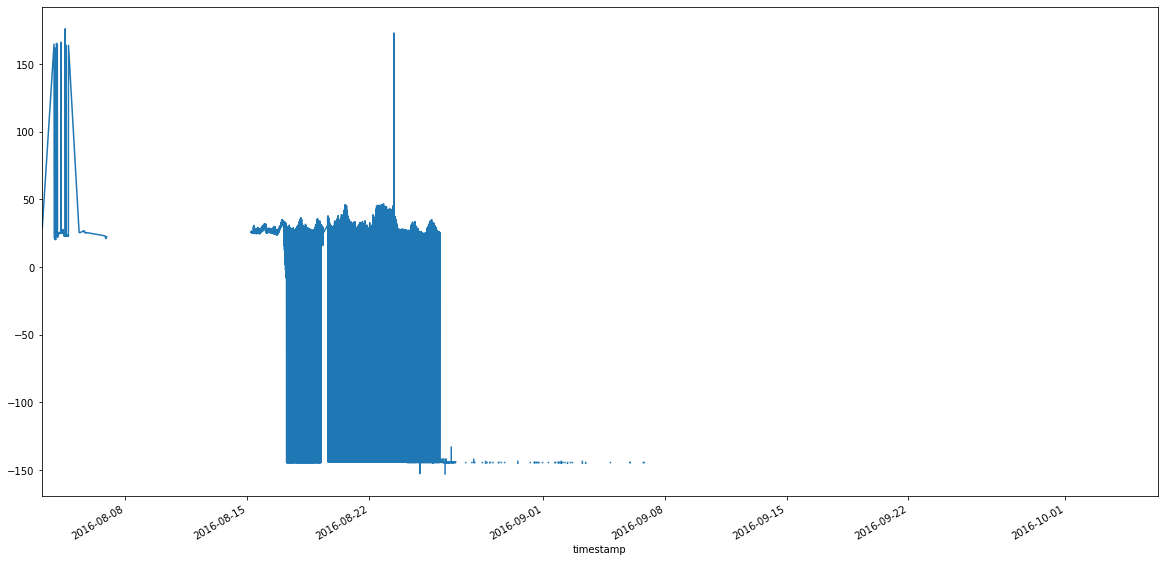

In [38]:
#for temp sensors

criteria = Data.type_id == 'TCA'
plt.figure(figsize=(20,10))
Data[criteria]['value'].plot()

In [39]:
temp_sensors = [s for s in Data[Data.type_id =='TCA']['id_x']]
temperature_senors = [s for t,s in zip(Data['type_id'], Data['id_x']) if t=='TCA'] # alternative way

sensor_id
1248ff60-e707-11e6-89c8-314aa4f67f8c    AxesSubplot(0.125,0.2;0.775x0.68)
7635c920-8679-11e6-a353-2f6c041e2491    AxesSubplot(0.125,0.2;0.775x0.68)
7635f030-8679-11e6-a353-2f6c041e2491    AxesSubplot(0.125,0.2;0.775x0.68)
7636da90-8679-11e6-a353-2f6c041e2491    AxesSubplot(0.125,0.2;0.775x0.68)
763701a0-8679-11e6-a353-2f6c041e2491    AxesSubplot(0.125,0.2;0.775x0.68)
                                                      ...                
e6678e90-8679-11e6-a353-2f6c041e2491    AxesSubplot(0.125,0.2;0.775x0.68)
e6678e91-8679-11e6-a353-2f6c041e2491    AxesSubplot(0.125,0.2;0.775x0.68)
e66851e0-8679-11e6-a353-2f6c041e2491    AxesSubplot(0.125,0.2;0.775x0.68)
e66851e1-8679-11e6-a353-2f6c041e2491    AxesSubplot(0.125,0.2;0.775x0.68)
e6691530-8679-11e6-a353-2f6c041e2491    AxesSubplot(0.125,0.2;0.775x0.68)
Name: value, Length: 61, dtype: object

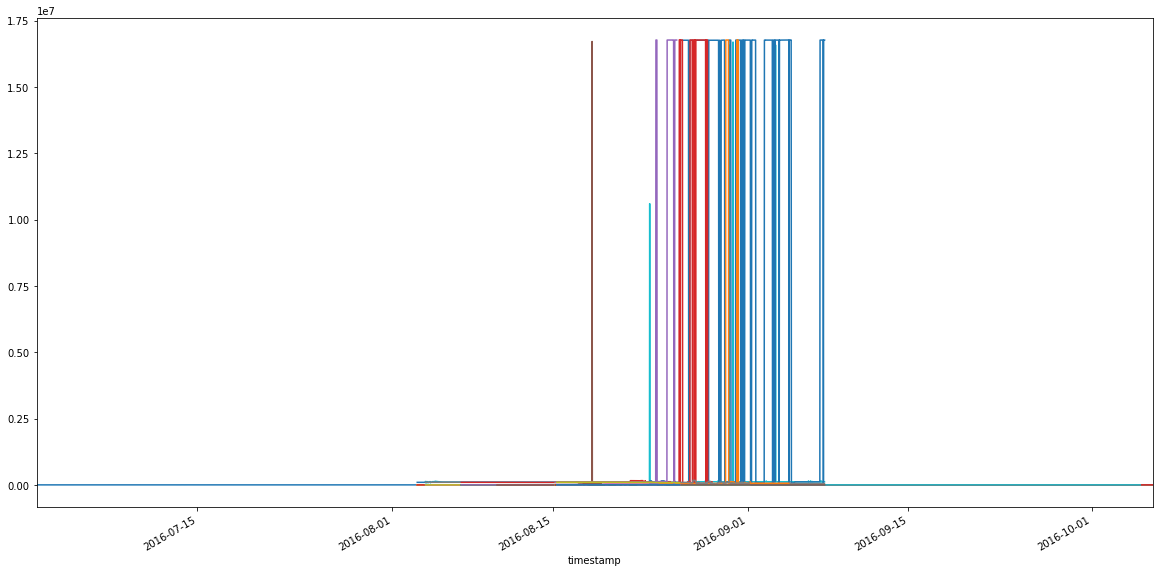

In [40]:
plt.figure(figsize=(20,10)) # Plot the different sesnors
g=Data.groupby('sensor_id')
g['value'].plot()  

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Group by sensor_ids and hence plot each group per time.

**Task: Creating Subplots - Each temperature sensor gets its own panel**

IndexError: index 10 is out of bounds for axis 0 with size 10

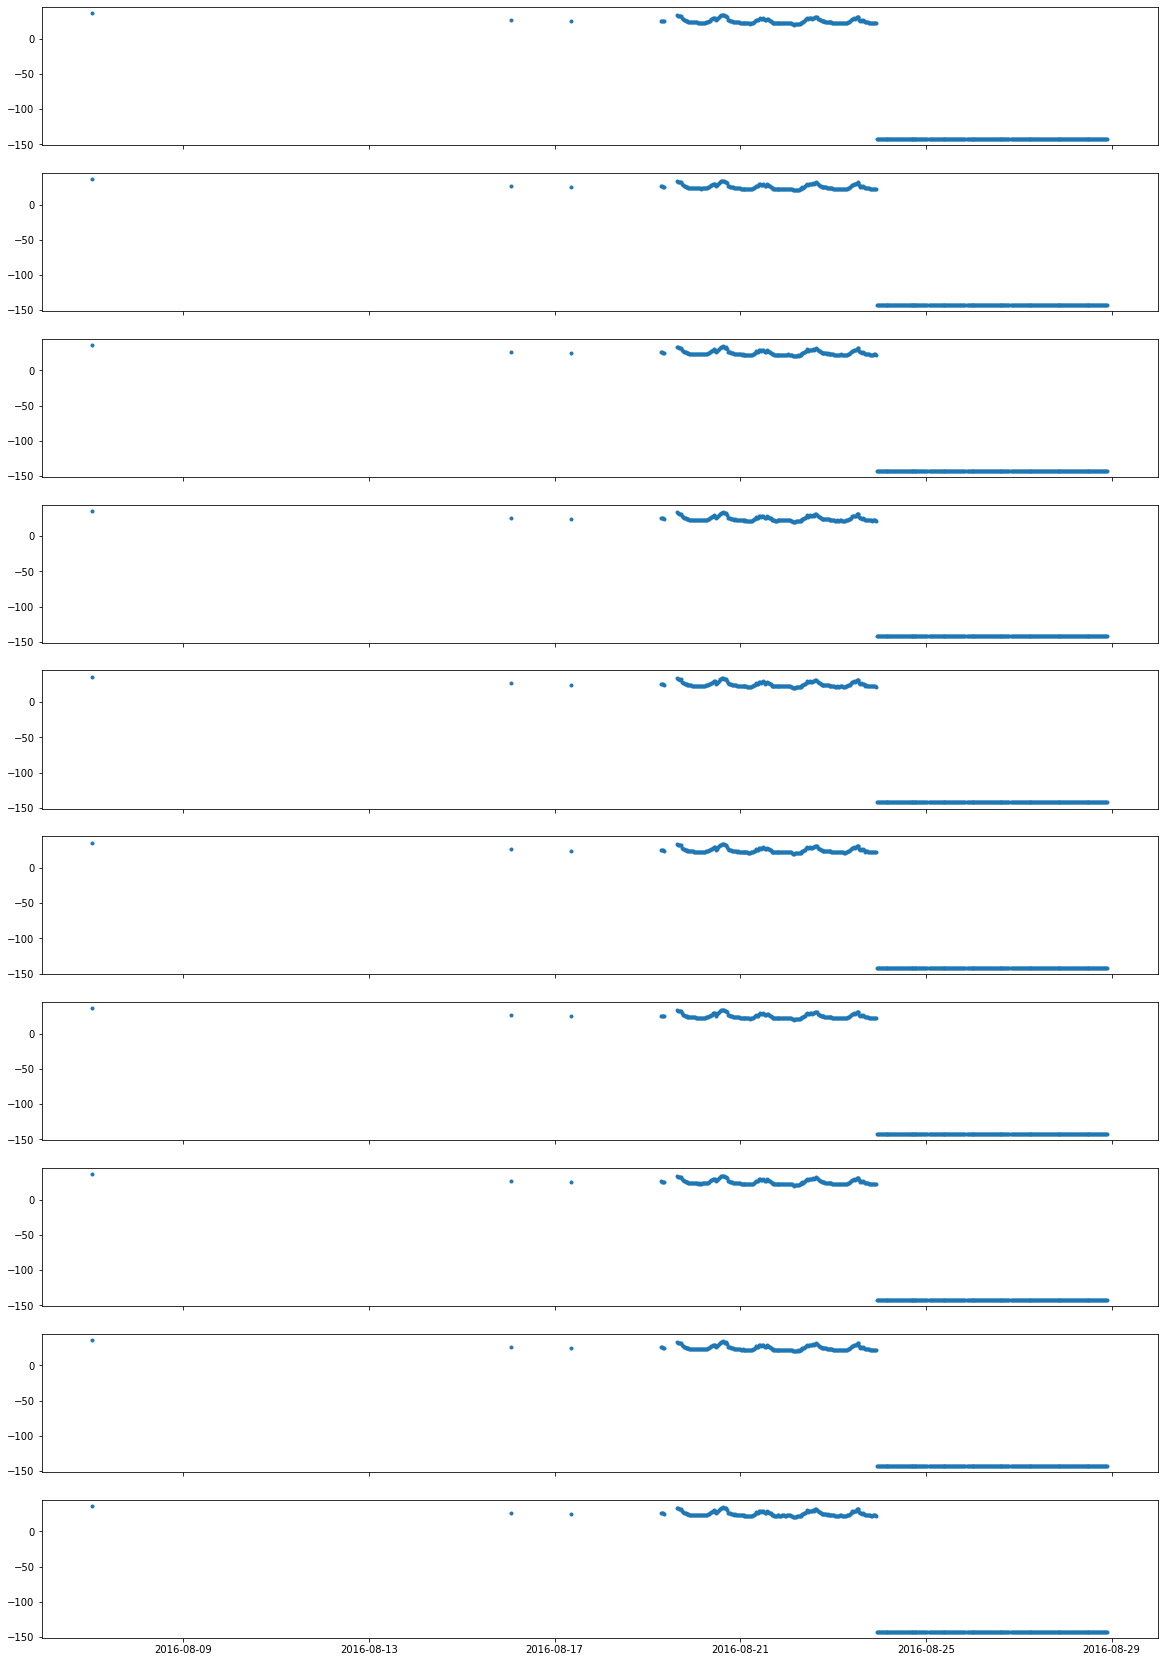

<Figure size 1440x1440 with 0 Axes>

In [41]:
fig, axarr = plt.subplots(10, sharex=True)
fig.set_size_inches(20,30) 

plt.figure(figsize=(20,20))
for i,s in enumerate(temp_sensors):
    sub_df = Data[Data['sensor_id']==s]
    axarr[i].plot(sub_df.index, sub_df['value'], '.')

Question: Based on the plots being made, comment on the readings made by the temperature sensors.

**Task: Clean Up Sensor Data**

In [ ]:
Data = Data.fillna(Data.mean())

## Task: Creating a reshaped Data Frame of Temperature sensors

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [42]:
Data.pivot(columns='sensor_id', values='value')

ValueError: Index contains duplicate entries, cannot reshape

Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [44]:
pd.concat(g for _, g in sensor.groupby("sensor_id") if len(g) > 1)

type_id  value                             sensor_id
timestamp                                                                     
2016-07-01 00:00:31+00:00    RSAM  455.0  1248ff60-e707-11e6-89c8-314aa4f67f8c
2016-07-01 00:10:02+00:00    RSAM  213.0  1248ff60-e707-11e6-89c8-314aa4f67f8c
2016-07-01 00:40:00+00:00    RSAM  429.0  1248ff60-e707-11e6-89c8-314aa4f67f8c
2016-07-01 00:20:00+00:00    RSAM  225.0  1248ff60-e707-11e6-89c8-314aa4f67f8c
2016-07-01 00:30:01+00:00    RSAM  321.0  1248ff60-e707-11e6-89c8-314aa4f67f8c
...                           ...    ...                                   ...
2016-09-07 17:01:42+00:00    HUMA    NaN  e6691530-8679-11e6-a353-2f6c041e2491
2016-09-07 17:04:51+00:00    HUMA    NaN  e6691530-8679-11e6-a353-2f6c041e2491
2016-09-07 17:08:00+00:00    HUMA    NaN  e6691530-8679-11e6-a353-2f6c041e2491
2016-09-07 16:58:33+00:00    HUMA    NaN  e6691530-8679-11e6-a353-2f6c041e2491
2016-09-07 16:55:23+00:00    HUMA    NaN  e6691530-8679-11e6-a353-2f6c041e2491

[176534 rows x 3 columns]

**Task: Drop Duplicates**
1. Drop all the rows where timestamp and sensor_id are duplicated
2. Pivot the table
3. Resample the temperature data to daily level.
4. Calculate the mean of the resampled daily data.

In [45]:
tdf = Data.drop_duplicates(subset = ['sensor_id'], keep='first')
tdf

id_x description_x  \
timestamp                                                                       
2016-08-07 00:51:40+00:00  c15a6370-8679-11e6-a353-2f6c041e2491            \N   
2016-08-07 00:51:40+00:00  c159c730-8679-11e6-a353-2f6c041e2491            \N   
2016-08-07 00:51:40+00:00  c159ee40-8679-11e6-a353-2f6c041e2491            \N   
2016-08-07 00:51:40+00:00  c15a6371-8679-11e6-a353-2f6c041e2491            \N   
2016-08-07 00:51:40+00:00  c15a6372-8679-11e6-a353-2f6c041e2491            \N   
...                                                         ...           ...   
2016-08-15 05:31:29+00:00  d3d3b290-8679-11e6-a353-2f6c041e2491            \N   
2016-08-15 05:31:29+00:00  d3d53930-8679-11e6-a353-2f6c041e2491            \N   
2016-08-15 05:31:29+00:00  d3d56040-8679-11e6-a353-2f6c041e2491            \N   
2016-08-15 05:31:29+00:00  d3d698c0-8679-11e6-a353-2f6c041e2491            \N   
2016-07-01 00:00:31+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N   

                           data_frequency status_x              created_at_x  \
timestamp                                                                      
2016-08-07 00:51:40+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
2016-08-07 00:51:40+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
2016-08-07 00:51:40+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
2016-08-07 00:51:40+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
2016-08-07 00:51:40+00:00         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
...                                   ...      ...                       ...   
2016-08-15 05:31:29+00:00         1800000  OFFLINE 2016-08-15 05:31:29+00:00   
2016-08-15 05:31:29+00:00         1800000  OFFLINE 2016-08-15 05:31:29+00:00   
2016-08-15 05:31:29+00:00         1800000  OFFLINE 2016-08-15 05:31:29+00:00   
2016-08-15 05:31:29+00:00         1800000  OFFLINE 2016-08-15 05:31:29+00:00   
2016-07-01 00:00:31+00:00         1800000  OFFLINE 2016-07-01 00:00:31+00:00   

                                              updated_at_x  \
timestamp                                                    
2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
2016-08-07 00:51:40+00:00 2016-09-29 20:13:52.831000+00:00   
2016-08-07 00:51:40+00:00 2016-09-29 20:13:52.833000+00:00   
2016-08-07 00:51:40+00:00 2016-09-29 20:13:52.836000+00:00   
2016-08-07 00:51:40+00:00 2016-09-29 20:13:52.838000+00:00   
...                                                    ...   
2016-08-15 05:31:29+00:00 2016-09-30 18:12:04.584000+00:00   
2016-08-15 05:31:29+00:00 2016-09-30 18:12:04.583000+00:00   
2016-08-15 05:31:29+00:00 2016-09-30 18:12:04.582000+00:00   
2016-08-15 05:31:29+00:00 2016-09-30 18:12:04.584000+00:00   
2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   

                                                   data_type_id  \
timestamp                                                         
2016-08-07 00:51:40+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
2016-08-07 00:51:40+00:00  35dcdad2-8679-11e6-bda3-ef77801087ee   
2016-08-07 00:51:40+00:00  35dcdad1-8679-11e6-bda3-ef77801087ee   
2016-08-07 00:51:40+00:00  35dcb3c0-8679-11e6-bda3-ef77801087ee   
2016-08-07 00:51:40+00:00  35dcb3c1-8679-11e6-bda3-ef77801087ee   
...                                                         ...   
2016-08-15 05:31:29+00:00  35dcdad1-8679-11e6-bda3-ef77801087ee   
2016-08-15 05:31:29+00:00  35dcb3c0-8679-11e6-bda3-ef77801087ee   
2016-08-15 05:31:29+00:00  35dcb3c1-8679-11e6-bda3-ef77801087ee   
2016-08-15 05:31:29+00:00  35dcb3c2-8679-11e6-bda3-ef77801087ee   
2016-07-01 00:00:31+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                                        node_id  \
timestamp                                                         
2016-08-07 00:51:40+00:00  c147ece0-8679-11e6-a353-2f6c041e2491   
2016-08-07 00:51:40+00:00  c147ece0-8679-11e6-a353-2f6c041e2491   
2016-08-07 00:51:

In [46]:
temp_df_cor = tdf.pivot(columns='sensor_id', values='value')
temp_df_cor

sensor_id                  1248ff60-e707-11e6-89c8-314aa4f67f8c  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                 455.0   
2016-08-03 04:39:25+00:00                                   NaN   
2016-08-03 21:50:32+00:00                                   NaN   
2016-08-03 22:09:40+00:00                                   NaN   
2016-08-07 00:51:40+00:00                                   NaN   
2016-08-10 04:20:22+00:00                                   NaN   
2016-08-15 05:22:31+00:00                                   NaN   
2016-08-15 05:31:29+00:00                                   NaN   
2016-08-15 06:10:39+00:00                                   NaN   
2016-08-15 08:46:05+00:00                                   NaN   
2016-08-15 09:16:04+00:00                                   NaN   
2016-08-15 09:46:03+00:00                                   NaN   
2016-08-15 10:16:01+00:00                                   NaN   
2016-08-17 01:06:49+00:00                                   NaN   
2016-08-17 01:36:49+00:00                                   NaN   
2016-08-17 02:06:47+00:00                                   NaN   
2016-08-17 03:36:44+00:00                                   NaN   
2016-08-17 04:06:42+00:00                                   NaN   

sensor_id                  7635c920-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-08-03 04:39:25+00:00                                  98.0   
2016-08-03 21:50:32+00:00                                   NaN   
2016-08-03 22:09:40+00:00                                   NaN   
2016-08-07 00:51:40+00:00                                   NaN   
2016-08-10 04:20:22+00:00                                   NaN   
2016-08-15 05:22:31+00:00                                   NaN   
2016-08-15 05:31:29+00:00                                   NaN   
2016-08-15 06:10:39+00:00                                   NaN   
2016-08-15 08:46:05+00:00                                   NaN   
2016-08-15 09:16:04+00:00                                   NaN   
2016-08-15 09:46:03+00:00                                   NaN   
2016-08-15 10:16:01+00:00                                   NaN   
2016-08-17 01:06:49+00:00                                   NaN   
2016-08-17 01:36:49+00:00                                   NaN   
2016-08-17 02:06:47+00:00                                   NaN   
2016-08-17 03:36:44+00:00                                   NaN   
2016-08-17 04:06:42+00:00                                   NaN   

sensor_id                  7635f030-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-08-03 04:39:25+00:00                                   NaN   
2016-08-03 21:50:32+00:00                                  96.0   
2016-08-03 22:09:40+00:00                                   NaN   
2016-08-07 00:51:40+00:00                                   NaN   
2016-08-10 04:20:22+00:00                                   NaN   
2016-08-15 05:22:31+00:00                                   NaN   
2016-08-15 05:31:29+00:00                                   NaN   
2016-08-15 06:10:39+00:00                                   NaN   
2016-08-15 08:46:05+00:00                                   NaN   
2016-08-15 09:16:04+00:00                                   NaN   
2016-08-15 09:46:03+00:00                                   NaN   
2016-08-15 10:16:01+00:00                                   NaN   
2016-08-17 01:06:49+00:00                                   NaN   
2016-08-17 01:36:49+00:00                                   NaN   
2016-08-17 02:06:47+00:00                                   NaN   
2016-08-17 03:36:44+00:00                                   NaN   
2016-08-17 04:06:42+00:00                    

In [47]:
daily_temp_cor_df = temp_df_cor.resample('D').mean()
daily_temp_cor_df

sensor_id                  1248ff60-e707-11e6-89c8-314aa4f67f8c  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                 455.0   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
2016-07-06 00:00:00+00:00                                   NaN   
2016-07-07 00:00:00+00:00                                   NaN   
2016-07-08 00:00:00+00:00                                   NaN   
2016-07-09 00:00:00+00:00                                   NaN   
2016-07-10 00:00:00+00:00                                   NaN   
2016-07-11 00:00:00+00:00                                   NaN   
2016-07-12 00:00:00+00:00                                   NaN   
2016-07-13 00:00:00+00:00                                   NaN   
2016-07-14 00:00:00+00:00                                   NaN   
2016-07-15 00:00:00+00:00                                   NaN   
2016-07-16 00:00:00+00:00                                   NaN   
2016-07-17 00:00:00+00:00                                   NaN   
2016-07-18 00:00:00+00:00                                   NaN   
2016-07-19 00:00:00+00:00                                   NaN   
2016-07-20 00:00:00+00:00                                   NaN   
2016-07-21 00:00:00+00:00                                   NaN   
2016-07-22 00:00:00+00:00                                   NaN   
2016-07-23 00:00:00+00:00                                   NaN   
2016-07-24 00:00:00+00:00                                   NaN   
2016-07-25 00:00:00+00:00                                   NaN   
2016-07-26 00:00:00+00:00                                   NaN   
2016-07-27 00:00:00+00:00                                   NaN   
2016-07-28 00:00:00+00:00                                   NaN   
2016-07-29 00:00:00+00:00                                   NaN   
2016-07-30 00:00:00+00:00                                   NaN   
2016-07-31 00:00:00+00:00                                   NaN   
2016-08-01 00:00:00+00:00                                   NaN   
2016-08-02 00:00:00+00:00                                   NaN   
2016-08-03 00:00:00+00:00                                   NaN   
2016-08-04 00:00:00+00:00                                   NaN   
2016-08-05 00:00:00+00:00                                   NaN   
2016-08-06 00:00:00+00:00                                   NaN   
2016-08-07 00:00:00+00:00                                   NaN   
2016-08-08 00:00:00+00:00                                   NaN   
2016-08-09 00:00:00+00:00                                   NaN   
2016-08-10 00:00:00+00:00                                   NaN   
2016-08-11 00:00:00+00:00                                   NaN   
2016-08-12 00:00:00+00:00                                   NaN   
2016-08-13 00:00:00+00:00                                   NaN   
2016-08-14 00:00:00+00:00                                   NaN   
2016-08-15 00:00:00+00:00                                   NaN   
2016-08-16 00:00:00+00:00                                   NaN   
2016-08-17 00:00:00+00:00                                   NaN   

sensor_id                  7635c920-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
2016-07-06 00:00:00+00:00                                   NaN   
2016-07-07 00:00:00+00:00                                   NaN   
2016-07-08 00:00:00+00:00                     

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [48]:
corr_df = daily_temp_cor_df.corr()
corr_df

sensor_id                             1248ff60-e707-11e6-89c8-314aa4f67f8c  \
sensor_id                                                                    
1248ff60-e707-11e6-89c8-314aa4f67f8c                                   NaN   
7635c920-8679-11e6-a353-2f6c041e2491                                   NaN   
7635f030-8679-11e6-a353-2f6c041e2491                                   NaN   
7636da90-8679-11e6-a353-2f6c041e2491                                   NaN   
763701a0-8679-11e6-a353-2f6c041e2491                                   NaN   
...                                                                    ...   
e6678e90-8679-11e6-a353-2f6c041e2491                                   NaN   
e6678e91-8679-11e6-a353-2f6c041e2491                                   NaN   
e66851e0-8679-11e6-a353-2f6c041e2491                                   NaN   
e66851e1-8679-11e6-a353-2f6c041e2491                                   NaN   
e6691530-8679-11e6-a353-2f6c041e2491                                   NaN   

sensor_id                             7635c920-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
1248ff60-e707-11e6-89c8-314aa4f67f8c                                   NaN   
7635c920-8679-11e6-a353-2f6c041e2491                                   NaN   
7635f030-8679-11e6-a353-2f6c041e2491                                   NaN   
7636da90-8679-11e6-a353-2f6c041e2491                                   NaN   
763701a0-8679-11e6-a353-2f6c041e2491                                   NaN   
...                                                                    ...   
e6678e90-8679-11e6-a353-2f6c041e2491                                   NaN   
e6678e91-8679-11e6-a353-2f6c041e2491                                   NaN   
e66851e0-8679-11e6-a353-2f6c041e2491                                   NaN   
e66851e1-8679-11e6-a353-2f6c041e2491                                   NaN   
e6691530-8679-11e6-a353-2f6c041e2491                                   NaN   

sensor_id                             7635f030-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
1248ff60-e707-11e6-89c8-314aa4f67f8c                                   NaN   
7635c920-8679-11e6-a353-2f6c041e2491                                   NaN   
7635f030-8679-11e6-a353-2f6c041e2491                                   NaN   
7636da90-8679-11e6-a353-2f6c041e2491                                   NaN   
763701a0-8679-11e6-a353-2f6c041e2491                                   NaN   
...                                                                    ...   
e6678e90-8679-11e6-a353-2f6c041e2491                                   NaN   
e6678e91-8679-11e6-a353-2f6c041e2491                                   NaN   
e66851e0-8679-11e6-a353-2f6c041e2491                                   NaN   
e66851e1-8679-11e6-a353-2f6c041e2491                                   NaN   
e6691530-8679-11e6-a353-2f6c041e2491                                   NaN   

sensor_id                             7636da90-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
1248ff60-e707-11e6-89c8-314aa4f67f8c                                   NaN   
7635c920-8679-11e6-a353-2f6c041e2491                                   NaN   
7635f030-8679-11e6-a353-2f6c041e2491                                   NaN   
7636da90-8679-11e6-a353-2f6c041e2491                                   NaN   
763701a0-8679-11e6-a353-2f6c041e2491                                   NaN   
...                                                                    ...   
e6678e90-8679-11e6-a353-2f6c041e2491                                   NaN   
e6678e91-8679-11e6-a353-2f6c041e2491                                   NaN   
e66851e0-8679-11e6-a353-2f6c041e2491                                   NaN   
e66851e1-8679-11e6-a353-2f6c041e2491                                   NaN   
e6691530-8679-11e6-

In [49]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

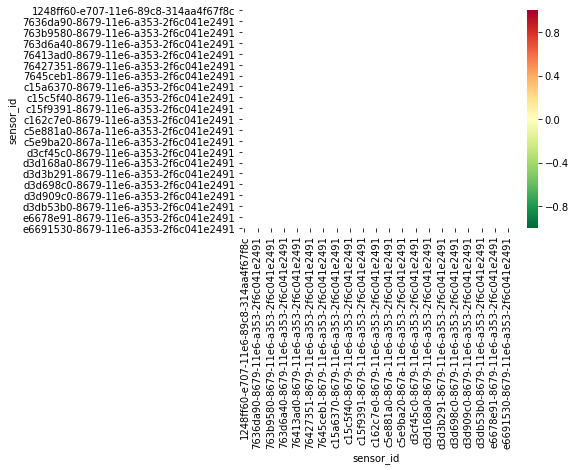

In [50]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [51]:
Data2 = Data.reset_index().drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
Data2

timestamp                                  id_x  \
0      2016-08-07 00:51:40+00:00  c15a6370-8679-11e6-a353-2f6c041e2491   
1      2016-08-16 01:15:58+00:00  c15a6370-8679-11e6-a353-2f6c041e2491   
2      2016-08-17 08:12:12+00:00  c15a6370-8679-11e6-a353-2f6c041e2491   
3      2016-08-19 15:41:08+00:00  c15a6370-8679-11e6-a353-2f6c041e2491   
4      2016-08-19 08:38:31+00:00  c15a6370-8679-11e6-a353-2f6c041e2491   
...                          ...                                   ...   
176529 2016-08-31 19:00:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176530 2016-08-31 19:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176531 2016-08-31 21:00:02+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176532 2016-08-31 21:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176533 2016-08-31 23:00:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   

       description_x  data_frequency status_x              created_at_x  \
0                 \N         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
1                 \N         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
2                 \N         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
3                 \N         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
4                 \N         1800000  OFFLINE 2016-08-07 00:51:40+00:00   
...              ...             ...      ...                       ...   
176529            \N         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
176530            \N         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
176531            \N         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
176532            \N         1800000  OFFLINE 2016-07-01 00:00:31+00:00   
176533            \N         1800000  OFFLINE 2016-07-01 00:00:31+00:00   

                           updated_at_x                          data_type_id  \
0      2016-09-29 19:41:07.066000+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
1      2016-09-29 19:41:07.066000+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
2      2016-09-29 19:41:07.066000+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
3      2016-09-29 19:41:07.066000+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
4      2016-09-29 19:41:07.066000+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
...                                 ...                                   ...   
176529 2017-01-30 16:24:05.832000+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176530 2017-01-30 16:24:05.832000+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176531 2017-01-30 16:24:05.832000+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176532 2017-01-30 16:24:05.832000+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176533 2017-01-30 16:24:05.832000+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                     node_id                          type  \
0       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
1       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
2       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
3       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
4       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
...                                      ...                           ...   
176529  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176530  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176531  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176532  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176533  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   

        ...  name description_y location status_y  \
0       ...    N9            \N       \N  OFFLINE   
1       ...    N9            \N       \N  OFFLINE   
2       ...    N9            \N       \N  OFFLINE   
3       ...    N9            \N       \N  OFFLINE   
4       ...    N9            \N       \N  OFFLINE   
...  

In [52]:
Data2['timestamp']=pd.to_datetime(Data2['timestamp'])

Data2.set_index('timestamp', inplace=True) 

In [53]:
Data_wide = Data2.pivot(columns='sensor_id', values='value')
Data_wide

sensor_id                  1248ff60-e707-11e6-89c8-314aa4f67f8c  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                 455.0   
2016-07-01 00:10:02+00:00                                 213.0   
2016-07-01 00:20:00+00:00                                 225.0   
2016-07-01 00:30:01+00:00                                 321.0   
2016-07-01 00:40:00+00:00                                 429.0   
...                                                         ...   
2016-10-06 07:08:04+00:00                                   NaN   
2016-10-06 07:12:12+00:00                                   NaN   
2016-10-06 07:20:18+00:00                                   NaN   
2016-10-06 07:25:56+00:00                                   NaN   
2016-10-06 07:32:51+00:00                                   NaN   

sensor_id                  7635c920-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-07-01 00:10:02+00:00                                   NaN   
2016-07-01 00:20:00+00:00                                   NaN   
2016-07-01 00:30:01+00:00                                   NaN   
2016-07-01 00:40:00+00:00                                   NaN   
...                                                         ...   
2016-10-06 07:08:04+00:00                                   NaN   
2016-10-06 07:12:12+00:00                                   NaN   
2016-10-06 07:20:18+00:00                                   NaN   
2016-10-06 07:25:56+00:00                                   NaN   
2016-10-06 07:32:51+00:00                                   NaN   

sensor_id                  7635f030-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-07-01 00:10:02+00:00                                   NaN   
2016-07-01 00:20:00+00:00                                   NaN   
2016-07-01 00:30:01+00:00                                   NaN   
2016-07-01 00:40:00+00:00                                   NaN   
...                                                         ...   
2016-10-06 07:08:04+00:00                                  64.0   
2016-10-06 07:12:12+00:00                                  65.0   
2016-10-06 07:20:18+00:00                                  66.0   
2016-10-06 07:25:56+00:00                                   NaN   
2016-10-06 07:32:51+00:00                                  65.0   

sensor_id                  7636da90-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-07-01 00:10:02+00:00                                   NaN   
2016-07-01 00:20:00+00:00                                   NaN   
2016-07-01 00:30:01+00:00                                   NaN   
2016-07-01 00:40:00+00:00                                   NaN   
...                                                         ...   
2016-10-06 07:08:04+00:00                                   NaN   
2016-10-06 07:12:12+00:00                                   NaN   
2016-10-06 07:20:18+00:00                                   NaN   
2016-10-06 07:25:56+00:00                                   NaN   
2016-10-06 07:32:51+00:00                                   NaN   

sensor_id                  763701a0-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-07-01 00:10:02+00:00                                   NaN   
2016-07-01 00:20:00+00:00                                   NaN   
2016-07-01 00:30:01+00:00                                   NaN   
2016-07-01 00:40:00+00:00                                   NaN   
...                                        

In [54]:
Data_wide.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36278 entries, 2016-07-01 00:00:31+00:00 to 2016-10-06 07:32:51+00:00
Data columns (total 61 columns):
1248ff60-e707-11e6-89c8-314aa4f67f8c    8816 non-null float64
7635c920-8679-11e6-a353-2f6c041e2491    907 non-null float64
7635f030-8679-11e6-a353-2f6c041e2491    4755 non-null float64
7636da90-8679-11e6-a353-2f6c041e2491    1003 non-null float64
763701a0-8679-11e6-a353-2f6c041e2491    1002 non-null float64
763701a1-8679-11e6-a353-2f6c041e2491    12 non-null float64
763b9580-8679-11e6-a353-2f6c041e2491    907 non-null float64
763bbc90-8679-11e6-a353-2f6c041e2491    1007 non-null float64
763ca6f0-8679-11e6-a353-2f6c041e2491    907 non-null float64
763d6a40-8679-11e6-a353-2f6c041e2491    1007 non-null float64
763d9150-8679-11e6-a353-2f6c041e2491    907 non-null float64
76402960-8679-11e6-a353-2f6c041e2491    1007 non-null float64
76413ad0-8679-11e6-a353-2f6c041e2491    1020 non-null float64
764161e0-8679-11e6-a353-2f6c041e2491    907 

In [55]:
daily_all_sensors = Data_wide.resample('D').mean()
daily_all_sensors

sensor_id                  1248ff60-e707-11e6-89c8-314aa4f67f8c  \
timestamp                                                         
2016-07-01 00:00:00+00:00                            306.902098   
2016-07-02 00:00:00+00:00                            267.804196   
2016-07-03 00:00:00+00:00                            286.972028   
2016-07-04 00:00:00+00:00                            339.860140   
2016-07-05 00:00:00+00:00                            445.828571   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  7635c920-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  7635f030-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                             83.110236   
2016-10-03 00:00:00+00:00                             78.088710   
2016-10-04 00:00:00+00:00                             72.263014   
2016-10-05 00:00:00+00:00                             67.166197   
2016-10-06 00:00:00+00:00                             60.514286   

sensor_id                  7636da90-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  763701a0-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                        

**Question:**
Based on the results of the correlation heatmap for temperature sensors, would you recommend working with all temperature sensors or just a subset?

Yes I could recommend working with all sensors as there is no correllation between the sensors

**Task: Based on the answer above, remove unnecessary temperature sensors from the data**

## Trying to building a Linear Model

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [56]:
Nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

**Task: Merge the full data set with the nodes**

1. Perform the merge above.
2. Resample the data to the daily level and show a sample of the mean.
3. Pivot the table to show columns of the sensor types as columns vs name and timestamp


<img src = "images/example-3.png" width=450 height=400>

In [57]:
DataB = pd.merge(merge2, datapoints1, left_on='id_x' ,right_on='sensor_id') 
DataB.head(2)

id_x description_x  data_frequency  \
0  c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
1  c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   

  status_x              created_at_x                     updated_at_x  \
0  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1  OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   

                           data_type_id                               node_id  \
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   
1  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491   

                           type si_unit  ... description_y location status_y  \
0  carbon dioxide concentration     ppm  ...            \N       \N  OFFLINE   
1  carbon dioxide concentration     ppm  ...            \N       \N  OFFLINE   

               created_at_y                     updated_at_y  \
0 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.065000+00:00   
1 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.065000+00:00   

                             volcano_id                           data_points  \
0  35dc3e90-8679-11e6-bda3-ef77801087ee  c17df100-8679-11e6-a353-2f6c041e2491   
1  35dc3e90-8679-11e6-bda3-ef77801087ee  43ccb4c0-867a-11e6-a353-2f6c041e2491   

     value                 timestamp                             sensor_id  
0  422.650 2016-08-07 00:51:40+00:00  c15a6370-8679-11e6-a353-2f6c041e2491  
1  298.581 2016-08-16 01:15:58+00:00  c15a6370-8679-11e6-a353-2f6c041e2491  

[2 rows x 22 columns]

In [58]:
DataB.info(), DataB.index

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176534 entries, 0 to 176533
Data columns (total 22 columns):
id_x              176534 non-null object
description_x     176534 non-null object
data_frequency    176534 non-null int64
status_x          176534 non-null object
created_at_x      176534 non-null datetime64[ns, UTC]
updated_at_x      176534 non-null datetime64[ns, UTC]
data_type_id      176534 non-null object
node_id           176534 non-null object
type              176534 non-null object
si_unit           176534 non-null object
type_id           176534 non-null object
name              176534 non-null object
description_y     176534 non-null object
location          176534 non-null object
status_y          176534 non-null object
created_at_y      176534 non-null datetime64[ns, UTC]
updated_at_y      176534 non-null datetime64[ns, UTC]
volcano_id        176534 non-null object
data_points       176534 non-null object
value             63456 non-null float64
timestamp         

(None,
 Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             176524, 176525, 176526, 176527, 176528, 176529, 176530, 176531,
             176532, 176533],
            dtype='int64', length=176534))

In [59]:
DataB

id_x description_x  data_frequency  \
0       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
1       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
2       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
3       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
4       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
...                                      ...           ...             ...   
176529  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   
176530  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   
176531  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   
176532  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   
176533  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   

       status_x              created_at_x                     updated_at_x  \
0       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
2       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
3       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
4       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
...         ...                       ...                              ...   
176529  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176530  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176531  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176532  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176533  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   

                                data_type_id  \
0       35dcdad0-8679-11e6-bda3-ef77801087ee   
1       35dcdad0-8679-11e6-bda3-ef77801087ee   
2       35dcdad0-8679-11e6-bda3-ef77801087ee   
3       35dcdad0-8679-11e6-bda3-ef77801087ee   
4       35dcdad0-8679-11e6-bda3-ef77801087ee   
...                                      ...   
176529  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176530  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176531  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176532  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176533  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                     node_id                          type  \
0       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
1       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
2       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
3       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
4       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
...                                      ...                           ...   
176529  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176530  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176531  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176532  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176533  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   

       si_unit  ... description_y location status_y  \
0          ppm  ...            \N       \N  OFFLINE   
1          ppm  ...            \N       \N  OFFLINE   
2          ppm  ...            \N       \N  OFFLINE   
3          ppm  ...            \N       \N  OFFLINE   
4          ppm  ...            \N       \N  OFFLINE   
...        ...  ...           ...      ...      ...   
176529  counts  ...            \N       \N  OFFLINE   
176530  counts  ...            \N       \N  OFFLINE   
176531  counts  ...            \N       \N  OFFLINE   
176532  counts  ...            \N       \N  OFFLINE   
176533  counts  ...            \N       \N  OFF

In [60]:
Datanode = pd.merge(DataB, Nodes, left_on='node_id', right_on='id')
Datanode

id_x description_x  data_frequency  \
0       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
1       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
2       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
3       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
4       c15a6370-8679-11e6-a353-2f6c041e2491            \N         1800000   
...                                      ...           ...             ...   
176529  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   
176530  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   
176531  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   
176532  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   
176533  1248ff60-e707-11e6-89c8-314aa4f67f8c            \N         1800000   

       status_x              created_at_x                     updated_at_x  \
0       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
2       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
3       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
4       OFFLINE 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
...         ...                       ...                              ...   
176529  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176530  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176531  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176532  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176533  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   

                                data_type_id  \
0       35dcdad0-8679-11e6-bda3-ef77801087ee   
1       35dcdad0-8679-11e6-bda3-ef77801087ee   
2       35dcdad0-8679-11e6-bda3-ef77801087ee   
3       35dcdad0-8679-11e6-bda3-ef77801087ee   
4       35dcdad0-8679-11e6-bda3-ef77801087ee   
...                                      ...   
176529  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176530  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176531  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176532  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176533  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                     node_id                          type  \
0       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
1       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
2       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
3       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
4       c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
...                                      ...                           ...   
176529  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176530  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176531  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176532  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   
176533  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   

       si_unit  ...                 timestamp  \
0          ppm  ... 2016-08-07 00:51:40+00:00   
1          ppm  ... 2016-08-16 01:15:58+00:00   
2          ppm  ... 2016-08-17 08:12:12+00:00   
3          ppm  ... 2016-08-19 15:41:08+00:00   
4          ppm  ... 2016-08-19 08:38:31+00:00   
...        ...  ...                       ...   
176529  counts  ... 2016-08-31 19:00:01+00:00   
176530  counts  ... 2016-08-31 19:50:00+00:00   
176531  counts  ... 2016-08-31 21:00:02+00:00   
176532  counts  ... 2016-08-31 21:50:00+00:00   
176533  counts  ... 2016-08-31 23:00:00+00:00   

                                   sensor_id  \
0       c15a637

In [61]:
Datanode.columns

Index(['id_x', 'description_x', 'data_frequency', 'status_x', 'created_at_x',
       'updated_at_x', 'data_type_id', 'node_id', 'type', 'si_unit', 'type_id',
       'name_x', 'description_y', 'location_x', 'status_y', 'created_at_y',
       'updated_at_y', 'volcano_id_x', 'data_points', 'value', 'timestamp',
       'sensor_id', 'id', 'name_y', 'description', 'location_y', 'status',
       'created_at', 'updated_at', 'volcano_id_y'],
      dtype='object')

In [62]:
Datanode.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            176524, 176525, 176526, 176527, 176528, 176529, 176530, 176531,
            176532, 176533],
           dtype='int64', length=176534)

In [63]:
Datanode.set_index('timestamp', inplace=True)

In [64]:
Datanode.resample('D').mean()

data_frequency       value
timestamp                                            
2016-07-01 00:00:00+00:00       1800000.0  306.902098
2016-07-02 00:00:00+00:00       1800000.0  267.804196
2016-07-03 00:00:00+00:00       1800000.0  286.972028
2016-07-04 00:00:00+00:00       1800000.0  339.860140
2016-07-05 00:00:00+00:00       1800000.0  445.828571
...                                   ...         ...
2016-10-02 00:00:00+00:00       1800000.0   84.783231
2016-10-03 00:00:00+00:00       1800000.0   79.059548
2016-10-04 00:00:00+00:00       1800000.0   77.155172
2016-10-05 00:00:00+00:00       1800000.0   73.356674
2016-10-06 00:00:00+00:00       1800000.0   68.235294

[98 rows x 2 columns]

In [65]:
Datanode.pivot_table(index=['timestamp', 'name_y'], columns='type', values='value')
fn_wide = Datanode.pivot_table(index=['timestamp','name_y'], columns=['type'], values='value')

In [66]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [67]:
fn_wide.head()

type                      name_y   RSAM  battery  \
timestamp                                          
2016-07-01 00:00:31+00:00   RSAM  455.0      NaN   
2016-07-01 00:10:02+00:00   RSAM  213.0      NaN   
2016-07-01 00:20:00+00:00   RSAM  225.0      NaN   
2016-07-01 00:30:01+00:00   RSAM  321.0      NaN   
2016-07-01 00:40:00+00:00   RSAM  429.0      NaN   

type                       carbon dioxide concentration  humidity  \
timestamp                                                           
2016-07-01 00:00:31+00:00                           NaN       NaN   
2016-07-01 00:10:02+00:00                           NaN       NaN   
2016-07-01 00:20:00+00:00                           NaN       NaN   
2016-07-01 00:30:01+00:00                           NaN       NaN   
2016-07-01 00:40:00+00:00                           NaN       NaN   

type                       hydrogen sulfide concentration  pressure  \
timestamp                                                             
2016-07-01 00:00:31+00:00                             NaN       NaN   
2016-07-01 00:10:02+00:00                             NaN       NaN   
2016-07-01 00:20:00+00:00                             NaN       NaN   
2016-07-01 00:30:01+00:00                             NaN       NaN   
2016-07-01 00:40:00+00:00                             NaN       NaN   

type                       temperature  
timestamp                               
2016-07-01 00:00:31+00:00          NaN  
2016-07-01 00:10:02+00:00          NaN  
2016-07-01 00:20:00+00:00          NaN  
2016-07-01 00:30:01+00:00          NaN  
2016-07-01 00:40:00+00:00          NaN

Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [69]:
lmfn = fn_wide.resample('D').mean()

In [70]:
lmfn.shape

(98, 7)

In [71]:
lmfn

type                             RSAM    battery  \
timestamp                                          
2016-07-01 00:00:00+00:00  306.902098        NaN   
2016-07-02 00:00:00+00:00  267.804196        NaN   
2016-07-03 00:00:00+00:00  286.972028        NaN   
2016-07-04 00:00:00+00:00  339.860140        NaN   
2016-07-05 00:00:00+00:00  445.828571        NaN   
...                               ...        ...   
2016-10-02 00:00:00+00:00         NaN  84.808642   
2016-10-03 00:00:00+00:00         NaN  79.055556   
2016-10-04 00:00:00+00:00         NaN  77.174946   
2016-10-05 00:00:00+00:00         NaN  73.323789   
2016-10-06 00:00:00+00:00         NaN  68.311111   

type                       carbon dioxide concentration  humidity  \
timestamp                                                           
2016-07-01 00:00:00+00:00                           NaN       NaN   
2016-07-02 00:00:00+00:00                           NaN       NaN   
2016-07-03 00:00:00+00:00                           NaN       NaN   
2016-07-04 00:00:00+00:00                           NaN       NaN   
2016-07-05 00:00:00+00:00                           NaN       NaN   
...                                                 ...       ...   
2016-10-02 00:00:00+00:00                           NaN       NaN   
2016-10-03 00:00:00+00:00                           NaN       NaN   
2016-10-04 00:00:00+00:00                           NaN       NaN   
2016-10-05 00:00:00+00:00                           NaN       NaN   
2016-10-06 00:00:00+00:00                           NaN       NaN   

type                       hydrogen sulfide concentration  pressure  \
timestamp                                                             
2016-07-01 00:00:00+00:00                             NaN       NaN   
2016-07-02 00:00:00+00:00                             NaN       NaN   
2016-07-03 00:00:00+00:00                             NaN       NaN   
2016-07-04 00:00:00+00:00                             NaN       NaN   
2016-07-05 00:00:00+00:00                             NaN       NaN   
...                                                   ...       ...   
2016-10-02 00:00:00+00:00                             NaN       NaN   
2016-10-03 00:00:00+00:00                             NaN       NaN   
2016-10-04 00:00:00+00:00                             NaN       NaN   
2016-10-05 00:00:00+00:00                             NaN       NaN   
2016-10-06 00:00:00+00:00                             NaN       NaN   

type                       temperature  
timestamp                               
2016-07-01 00:00:00+00:00          NaN  
2016-07-02 00:00:00+00:00          NaN  
2016-07-03 00:00:00+00:00          NaN  
2016-07-04 00:00:00+00:00          NaN  
2016-07-05 00:00:00+00:00          NaN  
...                                ...  
2016-10-02 00:00:00+00:00          NaN  
2016-10-03 00:00:00+00:00          NaN  
2016-10-04 00:00:00+00:00          NaN  
2016-10-05 00:00:00+00:00          NaN  
2016-10-06 00:00:00+00:00          NaN  

[98 rows x 7 columns]

In [72]:
lmfn = lmfn.fillna(lmfn.mean())

In [73]:
lmfn

type                             RSAM    battery  \
timestamp                                          
2016-07-01 00:00:00+00:00  306.902098  75.430055   
2016-07-02 00:00:00+00:00  267.804196  75.430055   
2016-07-03 00:00:00+00:00  286.972028  75.430055   
2016-07-04 00:00:00+00:00  339.860140  75.430055   
2016-07-05 00:00:00+00:00  445.828571  75.430055   
...                               ...        ...   
2016-10-02 00:00:00+00:00  261.939330  84.808642   
2016-10-03 00:00:00+00:00  261.939330  79.055556   
2016-10-04 00:00:00+00:00  261.939330  77.174946   
2016-10-05 00:00:00+00:00  261.939330  73.323789   
2016-10-06 00:00:00+00:00  261.939330  68.311111   

type                       carbon dioxide concentration   humidity  \
timestamp                                                            
2016-07-01 00:00:00+00:00                     346.82341  58.820877   
2016-07-02 00:00:00+00:00                     346.82341  58.820877   
2016-07-03 00:00:00+00:00                     346.82341  58.820877   
2016-07-04 00:00:00+00:00                     346.82341  58.820877   
2016-07-05 00:00:00+00:00                     346.82341  58.820877   
...                                                 ...        ...   
2016-10-02 00:00:00+00:00                     346.82341  58.820877   
2016-10-03 00:00:00+00:00                     346.82341  58.820877   
2016-10-04 00:00:00+00:00                     346.82341  58.820877   
2016-10-05 00:00:00+00:00                     346.82341  58.820877   
2016-10-06 00:00:00+00:00                     346.82341  58.820877   

type                       hydrogen sulfide concentration      pressure  \
timestamp                                                                 
2016-07-01 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-02 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-03 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-04 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-05 00:00:00+00:00                       29.616125  1.255737e+06   
...                                                   ...           ...   
2016-10-02 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-03 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-04 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-05 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-06 00:00:00+00:00                       29.616125  1.255737e+06   

type                       temperature  
timestamp                               
2016-07-01 00:00:00+00:00   -48.848781  
2016-07-02 00:00:00+00:00   -48.848781  
2016-07-03 00:00:00+00:00   -48.848781  
2016-07-04 00:00:00+00:00   -48.848781  
2016-07-05 00:00:00+00:00   -48.848781  
...                                ...  
2016-10-02 00:00:00+00:00   -48.848781  
2016-10-03 00:00:00+00:00   -48.848781  
2016-10-04 00:00:00+00:00   -48.848781  
2016-10-05 00:00:00+00:00   -48.848781  
2016-10-06 00:00:00+00:00   -48.848781  

[98 rows x 7 columns]

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [74]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# Split the data into training/testing sets
train = lmfn[:-30]
test = lmfn[-30:]

In [75]:
train.columns

Index(['RSAM', 'battery', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure', 'temperature'],
      dtype='object', name='type')

In [76]:
target, predictors = 'battery', 'temperature'

x_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train[target].to_frame()
x_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test[target].to_frame()

In [77]:
# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  0.25446040432384015
Mean squared error: 27.97
